**Created by Gael AHOUANVOEDO**

**🚀 Soccer Database 📊 Udacicty Data Analyst NanoDegree 📈**

**06 June 2022**

# **<center><span style="color:#fd7b12;">🚀 SOCCER DATABASE 🚀   </span></center>**
## <center>For more information you can contact me at +221781203911👍</center>

# **<span style="color:#fd7b12;">Table of Contents  </span>**
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Wrangling](#3)
- [4. Exploratory Data Analysis](#4)
- [5. Conclusions](#5)

<a id="1"></a>
# **<center><span style="color:#fd7b12;">Introduction  </span></center>**

**In this project I will have to exploit a database on football and get information out of it using pandas and numpy**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<center><span style="color:#fd7b12;">Imports  </span></center>**

<a id="3.1"></a>
## <span style="color:#e76f51;"> Useful librairies </span>

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import warnings
warnings.filterwarnings('ignore')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<center><span style="color:#fd7b12;">Data Wrangling </span></center>**

<a id="3.1"></a>
## <span style="color:#e76f51;"> Import given Dataset </span>

### <span style="color:#e76f51;"> SQL Querry </span>

In [96]:
con = sqlite3.connect("database.sqlite")
country = pd.read_sql_query("SELECT * from Country", con)
league = pd.read_sql_query("SELECT * from League", con)
match = pd.read_sql_query("SELECT * from Match", con)
player = pd.read_sql_query("SELECT * from Player", con)
player_attributes = pd.read_sql_query("SELECT * from Player_Attributes", con)
team = pd.read_sql_query("SELECT * from Team", con)
team_attributes = pd.read_sql_query("SELECT * from Team_Attributes", con)
con.close()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> EDA Country Dataset </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Dataset:</u></b><br>

* <i> There are total of <b><u>2 columns </u></b>and <b><u>11  rows </u></b>in the dataset.</i><br>
* <i> Dataset contains <b><u>22 observation</u></b> with <b><u>0 missing values</u></b>.</i><br>

## <span style="color:#e76f51;"> Quick view of the Dataset </span>

In [97]:
country.head(5)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [98]:
print(f'\033[94mNumber of rows in the dataset: {country.shape[0]}')
print(f'\033[94mNumber of columns in the dataseta: {country.shape[1]}')
print(f'\033[94mNumber of values in the dataset: {country.count().sum()}')
print(f'\033[94mNumber missing values in the dataset: {sum(country.isna().sum())}')

Number of rows in the dataset: 11
Number of columns in the dataseta: 2
Number of values in the dataset: 22
Number missing values in the dataset: 0


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> EDA League Dataset </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Dataset:</u></b><br>

* <i> There are total of <b><u>3 columns </u></b>and <b><u>11  rows </u></b>in the dataset.</i><br>
* <i> Dataset contains <b><u>33 observations</u></b> with <b><u>0 missing values</u></b>.</i><br>

## <span style="color:#e76f51;"> Quick view of the Dataset </span>

In [99]:
league.head(5)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [100]:
print(f'\033[94mNumber of rows in the dataset: {league.shape[0]}')
print(f'\033[94mNumber of columns in the dataseta: {league.shape[1]}')
print(f'\033[94mNumber of values in the dataset: {league.count().sum()}')
print(f'\033[94mNumber missing values in the dataset: {sum(league.isna().sum())}')

Number of rows in the dataset: 11
Number of columns in the dataseta: 3
Number of values in the dataset: 33
Number missing values in the dataset: 0


## <span style="color:#e76f51;"> Merge League and Country  </span>

In [101]:
country.rename(columns={'name':'country'}, inplace=True)
league = league.merge(country, how='inner', on= 'id' )
league.drop('country_id', axis=1,inplace=True)
league.head(10)

,id,name,country
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


In [102]:
league.nunique()

id         11
name       11
country    11
dtype: int64

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> EDA Team Dataset </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Dataset:</u></b><br>

* <i> There are total of <b><u>5 columns </u></b>and <b><u>299  rows </u></b>in the dataset.</i><br>
* <i> Dataset contains <b><u>1484 observations</u></b> with <b><u>11 missing values</u></b>.</i><br>

## <span style="color:#e76f51;"> Quick view of the Dataset </span>

In [103]:
team.head(5)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [104]:
print(f'\033[94mNumber of rows in the dataset: {team.shape[0]}')
print(f'\033[94mNumber of columns in the dataseta: {team.shape[1]}')
print(f'\033[94mNumber of values in the dataset: {team.count().sum()}')
print(f'\033[94mNumber missing values in the dataset: {sum(team.isna().sum())}')

Number of rows in the dataset: 299
Number of columns in the dataseta: 5
Number of values in the dataset: 1484
Number missing values in the dataset: 11


In [105]:
team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> EDA Match Dataset </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Dataset:</u></b><br>

* <i> There are total of <b><u>115 columns </u></b>and <b><u>25979  rows </u></b>in the dataset.</i><br>
* <i> Dataset contains <b><u>2580190 observations</u></b> with <b><u>407395 missing values</u></b>.</i><br>

## <span style="color:#e76f51;"> Quick view of the Dataset </span>

In [106]:
match.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [107]:
print(f'\033[94mNumber of rows in the dataset: {match.shape[0]}')
print(f'\033[94mNumber of columns in the dataseta: {match.shape[1]}')
print(f'\033[94mNumber of values in the dataset: {match.count().sum()}')
print(f'\033[94mNumber missing values in the dataset: {sum(match.isna().sum())}')

Number of rows in the dataset: 25979
Number of columns in the dataseta: 115
Number of values in the dataset: 2580190
Number missing values in the dataset: 407395


## <span style="color:#e76f51;"> Remove unnecessary columns</span>

In [108]:
match.drop(['id','country_id','match_api_id','date'],axis=1,inplace=True)

In [109]:
match.head(1)

,league_id,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,2008/2009,1,9987,9993,1,1,NaN,NaN,NaN,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [110]:
null = pd.DataFrame(match.isnull().sum()/len(match),columns=['count'])

In [111]:
null_drop = null.query('count > 0.34')

In [112]:
null_drop.index

Index(['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner',
       'possession', 'PSH', 'PSD', 'PSA', 'SJH', 'SJD', 'SJA', 'GBH', 'GBD',
       'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object')

In [113]:
match.drop(['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner','possession', 'PSH', 'PSD', 'PSA', 'SJH', 'SJD', 'SJA', 'GBH', 'GBD','GBA', 'BSH', 'BSD', 'BSA'],axis=1,inplace=True)

In [114]:
match.head(1)

,league_id,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,...,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
0,1,2008/2009,1,9987,9993,1,1,NaN,NaN,NaN,...,3.5,1.8,3.3,3.75,1.7,3.3,4.33,1.65,3.4,4.5


In [115]:
match.columns

Index(['league_id', 'season', 'stage', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
       'away_player_

In [116]:
match.drop(['home_player_X1', 'home_player_X2', 'home_player_X3','home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7','home_player_X8', 'home_player_X9', 'home_player_X10','home_player_X11'],axis=1,inplace=True)
match.drop(['away_player_X1', 'away_player_X2', 'away_player_X3','away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7','away_player_X8', 'away_player_X9', 'away_player_X10','away_player_X11'],axis=1,inplace=True)

In [117]:
match.drop(['home_player_Y1', 'home_player_Y2', 'home_player_Y3','home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7','home_player_Y8', 'home_player_Y9', 'home_player_Y10','home_player_Y11'],axis=1,inplace=True)
match.drop(['away_player_Y1', 'away_player_Y2', 'away_player_Y3','away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7','away_player_Y8', 'away_player_Y9', 'away_player_Y10','away_player_Y11'],axis=1,inplace=True)

In [118]:
match.drop(['home_player_1', 'home_player_2', 'home_player_3','home_player_4', 'home_player_5', 'home_player_6', 'home_player_7','home_player_8', 'home_player_9', 'home_player_10','home_player_11'],axis=1,inplace=True)
match.drop(['away_player_1', 'away_player_2', 'away_player_3','away_player_4', 'away_player_5', 'away_player_6', 'away_player_7','away_player_8', 'away_player_9', 'away_player_10','away_player_11'],axis=1,inplace=True)

In [119]:
match.columns

Index(['league_id', 'season', 'stage', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA'],
      dtype='object')

In [120]:
match.head()

,league_id,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,...,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
0,1,2008/2009,1,9987,9993,1,1,1.73,3.40,5.00,...,3.5,1.80,3.3,3.75,1.70,3.30,4.33,1.65,3.40,4.50
1,1,2008/2009,1,10000,9994,0,0,1.95,3.20,3.60,...,3.5,1.90,3.2,3.50,1.83,3.30,3.60,2.00,3.25,3.25
2,1,2008/2009,1,9984,8635,0,3,2.38,3.30,2.75,...,2.3,2.50,3.2,2.50,2.50,3.25,2.40,2.35,3.25,2.65
3,1,2008/2009,1,9991,9998,5,0,1.44,3.75,7.50,...,6.0,1.44,3.6,6.50,1.44,3.75,6.00,1.45,3.75,6.50
4,1,2008/2009,1,7947,9985,1,3,5.00,3.50,1.65,...,1.7,4.00,3.4,1.72,4.20,3.40,1.70,4.50,3.40,1.65


In [121]:
league.rename(columns={'id':'league_id'}, inplace=True)
match = match.merge(league, how='inner', on= 'league_id' )
match.drop(['league_id','country'], axis=1,inplace=True)
match.head(1)

,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,...,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,name
0,2008/2009,1,9987,9993,1,1,1.73,3.4,5.0,1.75,...,1.8,3.3,3.75,1.7,3.3,4.33,1.65,3.4,4.5,Belgium Jupiler League


In [122]:
match.columns

Index(['season', 'stage', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA', 'name'],
      dtype='object')

In [123]:
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [124]:
team.rename(columns={'team_api_id':'home_team_api_id'}, inplace=True)
match = match.merge(team, how='inner', on= 'home_team_api_id' )
match.drop(['id', 'team_fifa_api_id', 'team_fifa_api_id', 'team_short_name'], axis=1,inplace=True)
match.head(1)

,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,...,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,name,team_long_name
0,2008/2009,1,9987,9993,1,1,1.73,3.4,5.0,1.75,...,3.3,3.75,1.7,3.3,4.33,1.65,3.4,4.5,Belgium Jupiler League,KRC Genk


In [125]:
team.rename(columns={'home_team_api_id':'away_team_api_id'}, inplace=True)
match = match.merge(team, how='inner', on= 'away_team_api_id' )
match.drop(['id', 'team_fifa_api_id', 'team_fifa_api_id', 'team_short_name'], axis=1,inplace=True)
match.head(1)

,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,...,LBA,WHH,WHD,WHA,VCH,VCD,VCA,name,team_long_name_x,team_long_name_y
0,2008/2009,1,9987,9993,1,1,1.73,3.4,5.0,1.75,...,3.75,1.7,3.3,4.33,1.65,3.4,4.5,Belgium Jupiler League,KRC Genk,Beerschot AC


In [126]:
match.drop([ 'home_team_api_id', 'away_team_api_id'], axis=1,inplace=True)

In [127]:
match.columns

Index(['season', 'stage', 'home_team_goal', 'away_team_goal', 'B365H', 'B365D',
       'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'name', 'team_long_name_x',
       'team_long_name_y'],
      dtype='object')

In [128]:
match.drop([ 'B365H', 'B365D','B365A','IWH', 'IWD', 'IWA', 'LBH','LBD', 'LBA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA'], axis=1,inplace=True)

In [129]:
match.head(1)

,season,stage,home_team_goal,away_team_goal,BWH,BWD,BWA,name,team_long_name_x,team_long_name_y
0,2008/2009,1,1,1,1.75,3.35,4.2,Belgium Jupiler League,KRC Genk,Beerschot AC


In [130]:
match.columns

Index(['season', 'stage', 'home_team_goal', 'away_team_goal', 'BWH', 'BWD',
       'BWA', 'name', 'team_long_name_x', 'team_long_name_y'],
      dtype='object')

In [131]:
match.rename(columns = {'stage':'journey', 'home_team_goal':'HTG', 'away_team_goal':'ATG','name':'league', 'team_long_name_x':'home_team', 'team_long_name_y':'away_team'},inplace=True)

In [132]:
match.head(1)

,season,journey,HTG,ATG,BWH,BWD,BWA,league,home_team,away_team
0,2008/2009,1,1,1,1.75,3.35,4.2,Belgium Jupiler League,KRC Genk,Beerschot AC


In [133]:
match = match.reindex(columns=['season','journey','league','home_team','away_team','HTG','ATG', 'BWH', 'BWD', 'BWA'])

In [134]:
match.head(10)

,season,journey,league,home_team,away_team,HTG,ATG,BWH,BWD,BWA
0,2008/2009,1,Belgium Jupiler League,KRC Genk,Beerschot AC,1,1,1.75,3.35,4.20
1,2009/2010,5,Belgium Jupiler League,KRC Genk,Beerschot AC,1,1,1.80,3.40,3.95
2,2010/2011,1,Belgium Jupiler League,KRC Genk,Beerschot AC,2,1,1.91,3.30,3.70
3,2011/2012,1,Belgium Jupiler League,KRC Genk,Beerschot AC,3,1,1.45,3.95,6.25
4,2012/2013,11,Belgium Jupiler League,KRC Genk,Beerschot AC,3,0,1.50,4.00,5.50
5,2008/2009,12,Belgium Jupiler League,SV Zulte-Waregem,Beerschot AC,2,2,2.10,3.20,3.20
6,2009/2010,11,Belgium Jupiler League,SV Zulte-Waregem,Beerschot AC,4,0,1.95,3.25,3.55
7,2010/2011,8,Belgium Jupiler League,SV Zulte-Waregem,Beerschot AC,4,3,1.90,3.30,3.65
8,2011/2012,22,Belgium Jupiler League,SV Zulte-Waregem,Beerschot AC,1,0,1.95,3.30,3.80
9,2012/2013,18,Belgium Jupiler League,SV Zulte-Waregem,Beerschot AC,0,0,1.55,3.90,5.00


## <span style="color:#e76f51;"> Season variable analysis </span>

`How many games do you play in a season?`

In [135]:
match.season.unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2014/2015', '2015/2016', '2013/2014'], dtype=object)

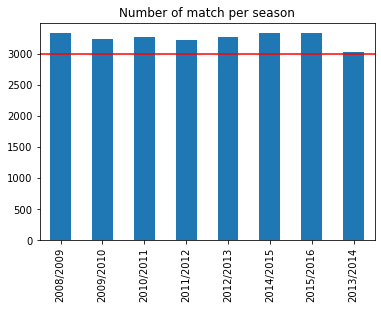

In [136]:
plt.figure()
match.season.value_counts(sort=False).plot(kind='bar')
plt.title('Number of match per season')
plt.axhline(y=3000, color='r', linestyle='-')

**It is noted that each season, at least 3000 matches have been played since 2008.**

## <span style="color:#e76f51;"> League variable analysis </span>

`Which league plays the most matches and which plays the least?`

Text(0.5, 1.0, 'Number of match per season')

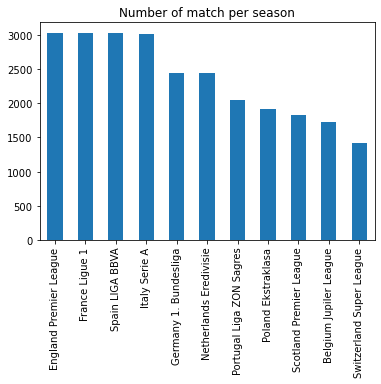

In [137]:
plt.figure()
match.league.value_counts(sort=True).plot(kind='bar')
plt.title('Number of match per season')

**The championship where we play the most is the English championship and the one where we play the least is the Swiss championship**

## <span style="color:#e76f51;"> HTG and ATG variables analysis </span>

`Of the home and away teams, who scores the most on average?`

In [138]:
match.HTG.describe()

count    25979.000000
mean         1.544594
std          1.297158
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: HTG, dtype: float64

In [139]:
match.ATG.describe()

count    25979.000000
mean         1.160938
std          1.142110
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: ATG, dtype: float64

**Home teams tend to score more goals than away teams**

## <span style="color:#e76f51;"> Bet variables analysis</span>

`In what direction do the predictions of bookmakers in general go?`

In [140]:
match.BWH.describe()

count    22575.000000
mean         2.559245
std          1.637983
min          1.030000
25%          1.650000
50%          2.100000
75%          2.750000
max         34.000000
Name: BWH, dtype: float64

In [141]:
match.BWA.describe()

count    22575.000000
mean         4.396949
std          3.292265
min          1.100000
25%          2.500000
50%          3.400000
75%          5.000000
max         51.000000
Name: BWA, dtype: float64

In [142]:
match.BWD.describe()

count    22575.000000
mean         3.747597
std          1.033468
min          1.650000
25%          3.200000
50%          3.400000
75%          3.800000
max         19.500000
Name: BWD, dtype: float64

**Among bookmakers the tendency is much more to designate the winning home team or to predict a draw**

## <span style="color:#e76f51;"> Cross analysis </span>

`Which teams have played every game since recording started in england?`

In [143]:
england_league = match.query('league=="England Premier League"')
england_league.head(10)

,season,journey,league,home_team,away_team,HTG,ATG,BWH,BWD,BWA
1728,2008/2009,1,England Premier League,Manchester United,Newcastle United,1,1,1.30,4.75,8.25
1729,2010/2011,1,England Premier League,Manchester United,Newcastle United,3,0,1.22,5.50,12.50
1730,2011/2012,13,England Premier League,Manchester United,Newcastle United,1,1,1.37,4.60,8.25
1731,2012/2013,19,England Premier League,Manchester United,Newcastle United,4,3,1.22,6.50,11.00
1732,2013/2014,15,England Premier League,Manchester United,Newcastle United,0,1,1.53,4.00,6.25
1733,2014/2015,18,England Premier League,Manchester United,Newcastle United,3,1,1.40,4.50,7.50
1734,2015/2016,3,England Premier League,Manchester United,Newcastle United,0,0,1.36,5.00,9.25
1735,2008/2009,3,England Premier League,Arsenal,Newcastle United,3,0,1.40,4.00,7.50
1736,2010/2011,11,England Premier League,Arsenal,Newcastle United,0,1,1.22,5.75,11.50
1737,2011/2012,28,England Premier League,Arsenal,Newcastle United,2,1,1.45,4.33,6.75


In [144]:
england_league_team = england_league.home_team.append(england_league.away_team)

In [145]:
max = len(england_league.season.unique())*38
print(max)

304


In [146]:
england_league_team.value_counts().head(11)

Manchester United       304
Liverpool               304
Sunderland              304
Arsenal                 304
Aston Villa             304
Everton                 304
Manchester City         304
Tottenham Hotspur       304
Chelsea                 304
Stoke City              304
West Bromwich Albion    266
dtype: int64

**The teams having played all the matches since the beginning of the recording are : Manchester United, Liverpool, Sunderland, Arsenal, Aston Villa, Everton, Manchester City, Tottenham Hotspur, Chelsea, Stoke City**

`Which team has scored the most goals?`

In [147]:
match.query('home_team== "Manchester United"').HTG.sum()+match.query('away_team== "Manchester United"').ATG.sum()

582

In [148]:
match.query('home_team== "Liverpool"').HTG.sum()+match.query('away_team== "Liverpool"').ATG.sum()

531

In [149]:
match.query('home_team== "Arsenal"').HTG.sum()+match.query('away_team== "Arsenal"').ATG.sum()

573

In [150]:
match.query('home_team== "Manchester City"').HTG.sum()+match.query('away_team== "Manchester City"').ATG.sum()

606

In [151]:
match.query('home_team== "Chelsea"').HTG.sum()+match.query('away_team== "Chelsea"').ATG.sum()

583

**Manchester City is the team that has scored the most goals over the period**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> EDA Player Dataset </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Dataset:</u></b><br>

* <i> There are total of <b><u>7 columns </u></b>and <b><u>11060  rows </u></b>in the dataset.</i><br>
* <i> Dataset contains <b><u>77420 observations</u></b> with <b><u>0 missing values</u></b>.</i><br>

## <span style="color:#e76f51;"> Quick view of the Dataset </span>

`What are the physical characteristics recommended to be a footballer?`

In [152]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [153]:
print(f'\033[94mNumber of rows in the dataset: {player.shape[0]}')
print(f'\033[94mNumber of columns in the dataseta: {player.shape[1]}')
print(f'\033[94mNumber of values in the dataset: {player.count().sum()}')
print(f'\033[94mNumber missing values in the dataset: {sum(player.isna().sum())}')

Number of rows in the dataset: 11060
Number of columns in the dataseta: 7
Number of values in the dataset: 77420
Number missing values in the dataset: 0


## <span style="color:#e76f51;"> Height and Weight variables analysis</span>

In [154]:
player.height.describe()

count    11060.000000
mean       181.867445
std          6.369201
min        157.480000
25%        177.800000
50%        182.880000
75%        185.420000
max        208.280000
Name: height, dtype: float64

In [155]:
player.weight.describe()

count    11060.000000
mean       168.380289
std         14.990217
min        117.000000
25%        159.000000
50%        168.000000
75%        179.000000
max        243.000000
Name: weight, dtype: float64

**The physical characteristics recommended to be a footballer are ---->**
**Height : 177, Weight : 168**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> EDA Player Dataset </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Dataset:</u></b><br>

* <i> There are total of <b><u>42 columns </u></b>and <b><u>183978  rows </u></b>in the dataset.</i><br>
* <i> Dataset contains <b><u>7679775 observations</u></b> with <b><u>47301 missing values</u></b>.</i><br>

## <span style="color:#e76f51;"> Quick view of the Dataset </span>

In [158]:
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [159]:
print(f'\033[94mNumber of rows in the dataset: {player_attributes.shape[0]}')
print(f'\033[94mNumber of columns in the dataseta: {player_attributes.shape[1]}')
print(f'\033[94mNumber of values in the dataset: {player_attributes.count().sum()}')
print(f'\033[94mNumber missing values in the dataset: {sum(player_attributes.isna().sum())}')

Number of rows in the dataset: 183978
Number of columns in the dataseta: 42
Number of values in the dataset: 7679775
Number missing values in the dataset: 47301


## <span style="color:#e76f51;"> Merge Player and Player attributes </span>

In [160]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [161]:
player.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

In [162]:
player_attributes = player_attributes.merge(player,how='inner', on='player_api_id')
player_attributes.drop(['player_api_id', 'birthday','height', 'weight','id_y','player_fifa_api_id_y'],axis=1,inplace=True)
player_attributes.head(5)

,id_x,player_fifa_api_id_x,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name
0,1,218353,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
1,2,218353,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
2,3,218353,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
3,4,218353,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye
4,5,218353,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye


In [163]:
player_attributes.columns

Index(['id_x', 'player_fifa_api_id_x', 'date', 'overall_rating', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'player_name'],
      dtype='object')

In [164]:
player_attributes = player_attributes[['id_x', 'player_fifa_api_id_x', 'player_name','date', 'overall_rating', 'potential','preferred_foot', 'attacking_work_rate', 'defensive_work_rate','crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys','dribbling', 'curve', 'free_kick_accuracy', 'long_passing','ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions','balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots','aggression', 'interceptions', 'positioning', 'vision', 'penalties','marking', 'standing_tackle', 'sliding_tackle', 'gk_diving','gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']]
player_attributes.head(2)

,id_x,player_fifa_api_id_x,player_name,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,Aaron Appindangoye,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,Aaron Appindangoye,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [165]:
player_attributes.columns

Index(['id_x', 'player_fifa_api_id_x', 'player_name', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [166]:
player_attributes.drop(['id_x','player_fifa_api_id_x'],axis=1, inplace=True)

In [167]:
player_attributes.date = player_attributes.date.str[:4]

In [168]:
player_attributes.head(2)

,player_name,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,2016,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,Aaron Appindangoye,2015,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


`Who is the best player right now in the database?`

## <span style="color:#e76f51;"> Variables analysis </span>

In [171]:
player_attributes_2016 = player_attributes.query('date=="2016"')
player_attributes_2016.head()

,player_name,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,2016,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
5,Aaron Cresswell,2016,74.0,76.0,left,high,medium,80.0,53.0,58.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,Aaron Cresswell,2016,74.0,76.0,left,high,medium,80.0,53.0,58.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,Aaron Cresswell,2016,73.0,75.0,left,high,medium,79.0,52.0,57.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
38,Aaron Doran,2016,65.0,67.0,right,medium,medium,64.0,58.0,60.0,...,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0


In [172]:
player_attributes_2016.query('overall_rating==overall_rating.max()')

,player_name,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
109033,Manuel Neuer,2016,90.0,90.0,right,medium,medium,15.0,13.0,25.0,...,70.0,37.0,10.0,10.0,11.0,85.0,87.0,91.0,90.0,87.0
109034,Manuel Neuer,2016,90.0,90.0,right,medium,medium,15.0,13.0,25.0,...,70.0,37.0,10.0,10.0,11.0,85.0,87.0,91.0,90.0,87.0
109035,Manuel Neuer,2016,90.0,90.0,right,medium,medium,15.0,13.0,25.0,...,70.0,37.0,10.0,10.0,11.0,85.0,87.0,91.0,90.0,87.0
131464,Neymar,2016,90.0,94.0,right,high,medium,72.0,88.0,62.0,...,79.0,81.0,21.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
131465,Neymar,2016,90.0,94.0,right,high,medium,72.0,89.0,62.0,...,79.0,81.0,21.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0


**In our dataset, the best players are Neuer and Neymar**

`Who is the best potential right now in the database?`

In [173]:
player_attributes_2016.query('potential==potential.max()')

,player_name,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
131464,Neymar,2016,90.0,94.0,right,high,medium,72.0,88.0,62.0,...,79.0,81.0,21.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
131465,Neymar,2016,90.0,94.0,right,high,medium,72.0,89.0,62.0,...,79.0,81.0,21.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0


**In our dataset, the best potential is Neymar**

`A club wants to recruit an attacking player who is also involved in defensive play and who has a very good level. who would you advise?`

In [174]:
player_attributes_2016.query('attacking_work_rate=="high" &defensive_work_rate=="high" & overall_rating >85 ')

,player_name,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
8485,Alexis Sanchez,2016,86.0,87.0,right,high,high,77.0,83.0,65.0,...,78.0,77.0,30.0,39.0,35.0,10.0,10.0,15.0,12.0,13.0
8486,Alexis Sanchez,2016,86.0,87.0,right,high,high,77.0,84.0,65.0,...,78.0,77.0,30.0,39.0,35.0,10.0,10.0,15.0,12.0,13.0
8487,Alexis Sanchez,2016,86.0,87.0,right,high,high,77.0,85.0,65.0,...,78.0,77.0,30.0,39.0,35.0,10.0,10.0,15.0,12.0,13.0
8488,Alexis Sanchez,2016,86.0,87.0,right,high,high,77.0,85.0,65.0,...,78.0,77.0,30.0,39.0,35.0,10.0,10.0,15.0,12.0,13.0
19614,Bastian Schweinsteiger,2016,86.0,86.0,right,high,high,79.0,76.0,79.0,...,86.0,83.0,68.0,78.0,76.0,14.0,14.0,13.0,13.0,11.0
26301,Carlos Tevez,2016,86.0,86.0,right,high,high,73.0,88.0,60.0,...,80.0,82.0,39.0,51.0,51.0,4.0,2.0,3.0,2.0,4.0
170797,Thomas Mueller,2016,86.0,88.0,right,high,high,79.0,89.0,82.0,...,85.0,82.0,32.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0
170798,Thomas Mueller,2016,86.0,88.0,right,high,high,79.0,89.0,82.0,...,85.0,90.0,32.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0
170799,Thomas Mueller,2016,86.0,88.0,right,high,high,79.0,89.0,82.0,...,85.0,90.0,32.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0


**The players who best match the request are : Alexis Sanchez, Bastian Schweinsteiger, Calos Tevez, Thomas Mueller**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> EDA Team attributes Dataset </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Dataset:</u></b><br>

* <i> There are total of <b><u>40 columns </u></b>and <b><u>183978  rows </u></b>in the dataset.</i><br>
* <i> Dataset contains <b><u>7311819 observations</u></b> with <b><u>47301 missing values</u></b>.</i><br>

## <span style="color:#e76f51;"> Quick view of the Dataset </span>

In [177]:
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [178]:
print(f'\033[94mNumber of rows in the dataset: {player_attributes.shape[0]}')
print(f'\033[94mNumber of columns in the dataseta: {player_attributes.shape[1]}')
print(f'\033[94mNumber of values in the dataset: {player_attributes.count().sum()}')
print(f'\033[94mNumber missing values in the dataset: {sum(player_attributes.isna().sum())}')

Number of rows in the dataset: 183978
Number of columns in the dataseta: 40
Number of values in the dataset: 7311819
Number missing values in the dataset: 47301


## <span style="color:#e76f51;"> Merge Team attributes and Team </span>

In [180]:
team_attributes.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [181]:
team.columns

Index(['id', 'away_team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')

In [182]:
team_attributes = team_attributes.merge(team,how='inner', on='team_fifa_api_id')
team_attributes.drop(['id_y', 'away_team_api_id', 'team_short_name','id_x','team_fifa_api_id','team_api_id'],axis=1,inplace=True)
team_attributes.head(5)

,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name
0,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau
1,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
2,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
3,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,...,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen
4,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,...,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen


In [183]:
team_attributes.columns

Index(['date', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass',
       'buildUpPlayDribbling', 'buildUpPlayDribblingClass',
       'buildUpPlayPassing', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationPassing',
       'chanceCreationPassingClass', 'chanceCreationCrossing',
       'chanceCreationCrossingClass', 'chanceCreationShooting',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressure', 'defencePressureClass', 'defenceAggression',
       'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass', 'team_long_name'],
      dtype='object')

In [184]:
team_attributes = team_attributes[['team_long_name','date', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass','buildUpPlayDribbling', 'buildUpPlayDribblingClass','buildUpPlayPassing', 'buildUpPlayPassingClass','buildUpPlayPositioningClass', 'chanceCreationPassing','chanceCreationPassingClass', 'chanceCreationCrossing','chanceCreationCrossingClass', 'chanceCreationShooting','chanceCreationShootingClass', 'chanceCreationPositioningClass','defencePressure', 'defencePressureClass', 'defenceAggression','defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass','defenceDefenderLineClass', ]]

## <span style="color:#e76f51;"> Variables Analysis </span>

`A player wants to play in the club that has the best passing game, which club would you recommend?`

In [185]:
team_attributes.date = team_attributes.date.str[:4]

In [186]:
team_attributes.date.unique()

array(['2010', '2014', '2015', '2011', '2012', '2013'], dtype=object)

In [187]:
team_attributes_2015 = team_attributes.query('date=="2015"')
team_attributes_2015.head()

,team_long_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
2,FC Aarau,2015,47,Balanced,41.0,Normal,54,Mixed,Organised,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
8,Aberdeen,2015,59,Balanced,64.0,Normal,53,Mixed,Organised,51,...,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
14,AC Ajaccio,2015,59,Balanced,57.0,Normal,52,Mixed,Organised,48,...,52,Normal,Organised,38,Medium,47,Press,53,Normal,Cover
20,Milan,2015,48,Balanced,70.0,Lots,52,Mixed,Organised,66,...,69,Lots,Organised,58,Medium,57,Press,49,Normal,Cover
26,Académica de Coimbra,2015,53,Balanced,53.0,Normal,44,Mixed,Organised,55,...,60,Normal,Organised,39,Medium,38,Press,61,Normal,Cover


In [188]:
team_attributes_2015.drop(['buildUpPlaySpeedClass','buildUpPlayDribblingClass', 'buildUpPlayPassingClass','buildUpPlayPositioningClass','chanceCreationPassingClass', 'chanceCreationCrossingClass', 'chanceCreationShootingClass', 'chanceCreationPositioningClass','defencePressureClass', 'defenceAggressionClass', 'defenceTeamWidthClass','defenceDefenderLineClass', ],axis=1,inplace=True)

In [189]:
team_attributes_2015.head(5)

,team_long_name,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
2,FC Aarau,2015,47,41.0,54,54,63,64,47,44,54
8,Aberdeen,2015,59,64.0,53,51,72,63,49,45,63
14,AC Ajaccio,2015,59,57.0,52,48,38,52,38,47,53
20,Milan,2015,48,70.0,52,66,36,69,58,57,49
26,Académica de Coimbra,2015,53,53.0,44,55,51,60,39,38,61


In [190]:
team_attributes_2015.buildUpPlayPassing.isnull().sum()

0

In [191]:
team_attributes_2015.chanceCreationPassing.isnull().sum()

0

In [192]:
team_attributes_2015['generalPassing'] = team_attributes_2015['chanceCreationPassing']+team_attributes_2015['chanceCreationPassing']
team_attributes_2015['generalPassing'] = team_attributes_2015['generalPassing']/2

In [193]:
team_attributes_2015.head(5)

,team_long_name,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,generalPassing
2,FC Aarau,2015,47,41.0,54,54,63,64,47,44,54,54.0
8,Aberdeen,2015,59,64.0,53,51,72,63,49,45,63,51.0
14,AC Ajaccio,2015,59,57.0,52,48,38,52,38,47,53,48.0
20,Milan,2015,48,70.0,52,66,36,69,58,57,49,66.0
26,Académica de Coimbra,2015,53,53.0,44,55,51,60,39,38,61,55.0


In [194]:
team_attributes_2015.query('generalPassing==generalPassing.max()')

,team_long_name,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,generalPassing
141,Bayer 04 Leverkusen,2015,73,29.0,55,77,54,61,61,72,50,77.0
171,Birmingham City,2015,56,32.0,75,77,62,64,42,47,54,77.0


**I would advise him to sign for Bayer Leverkusen or Birmigham**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a>
# **<center><span style="color:#fd7b12;">Conclusion  </span></center>**

`How many games do you play in a season?`

**It is noted that each season, at least 3000 matches have been played since 2008.**

`Which league plays the most matches and which plays the least?`

**The championship where we play the most is the English championship and the one where we play the least is the Swiss championship**

`Of the home and away teams, who scores the most on average?`

**Home teams tend to score more goals than away teams**

`In what direction do the predictions of bookmakers in general go?`

**Among bookmakers the tendency is much more to designate the winning home team or to predict a draw**

`Which teams have played every game since recording started in england?`

**The teams having played all the matches since the beginning of the recording are : Manchester United, Liverpool, Sunderland, Arsenal, Aston Villa, Everton, Manchester City, Tottenham Hotspur, Chelsea, Stoke City**

`Which team has scored the most goals?`

**Manchester City is the team that has scored the most goals over the period**

`What are the physical characteristics recommended to be a footballer?`

**The physical characteristics recommended to be a footballer are ---->**
**Height : 177, Weight : 168**

`Who is the best player right now in the database?`

**In our dataset, the best players are Neuer and Neymar**

`Who is the best potential right now in the database?`

**In our dataset, the best potential is Neymar**

`A club wants to recruit an attacking player who is also involved in defensive play and who has a very good level. who would you advise?`

**The players who best match the request are : Alexis Sanchez, Bastian Schweinsteiger, Calos Tevez, Thomas Mueller**

`A player wants to play in the club that has the best passing game, which club would you recommend?`

**I would advise him to sign for Bayer Leverkusen or Birmigham**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>